In [26]:
import dvc.api
import pandas as pd
import matplotlib.pyplot as plt

Index(['Experiment', 'rev', 'typ', 'Created', 'parent', 'State', 'Executor',
       'train.accuracy', 'train.loss', 'eval.accuracy', 'eval.loss', 'step',
       'dice_multi', 'base.random_seed', 'base.model_image_size',
       'data_split.test_split', 'data_split.data_dir',
       'data_split.train_data_dir', 'data_split.test_data_dir',
       'train.train_data_dir', 'train.model_save_dir', 'train.batch_size',
       'train.epochs', 'train.norm_upper_bound', 'train.norm_lower_bound',
       'train.validation_split', 'evaluate.model_path',
       'evaluate.test_data_dir', 'data/all_data', 'data/test', 'data/train',
       'models/catsnet_model.keras', 'src/data_split.py', 'src/evaluate.py',
       'src/train.py'],
      dtype='object')


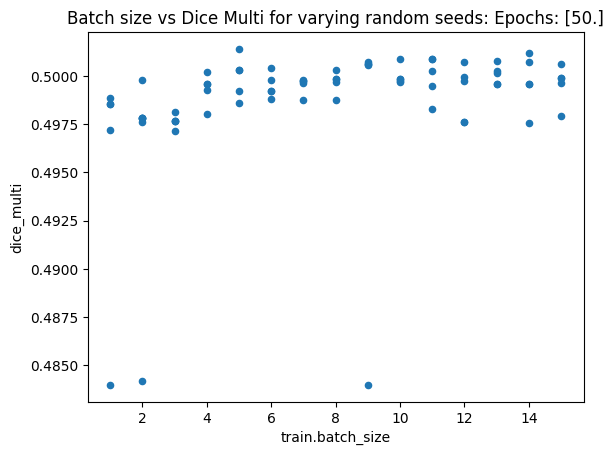

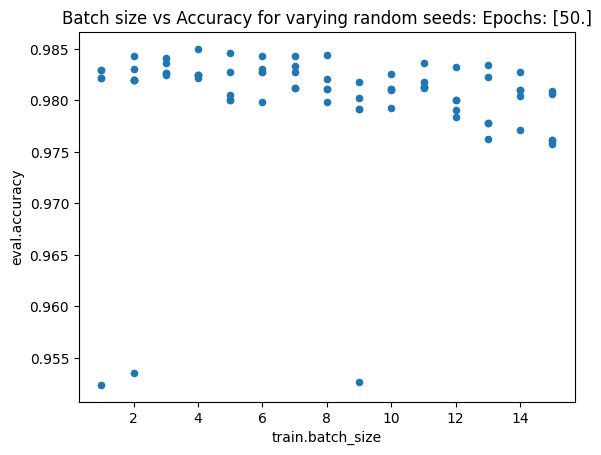

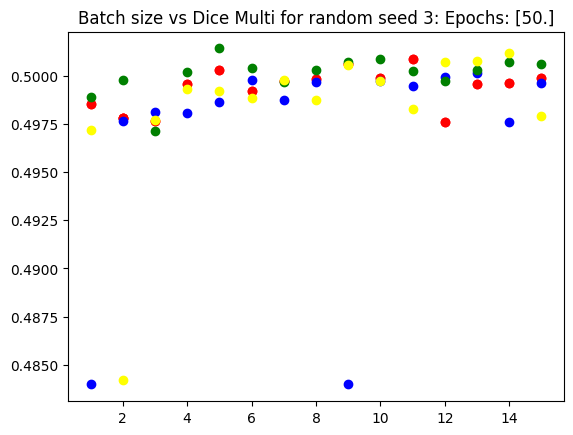

In [41]:
df = pd.DataFrame(dvc.api.exp_show())

# Print all the columns
print(df.columns)

# Plot batch size vs dice_multi
df.plot(x="train.batch_size", y="dice_multi", kind="scatter")
plt.title(f'Batch size vs Dice Multi for varying random seeds: Epochs: {df["train.epochs"].unique()}')

df.plot(x="train.batch_size", y="eval.accuracy", kind="scatter")
plt.title(f'Batch size vs Accuracy for varying random seeds: Epochs: {df["train.epochs"].unique()}')
plt.show()


# Plot the scatter plots but with the colour of the dot corresponding to the random seed
seed_to_colour = {
    0: "red",
    1: "blue",
    2: "green",
    3: "yellow",
}

for seed, colour in seed_to_colour.items():
    df_seed = df[df["base.random_seed"] == seed]
    # df_seed.plot(x="train.batch_size", y="dice_multi", kind="scatter", color=colour)
    plt.scatter(df_seed["train.batch_size"], df_seed["dice_multi"], color=colour)
    plt.title(f'Batch size vs Dice Multi for random seed {seed}: Epochs: {df["train.epochs"].unique()}')


# df_seed.plot(x="train.batch_size", y="eval.accuracy", kind="scatter", color=colour)
# plt.title(f'Batch size vs Accuracy for random seed {seed}: Epochs: {df["train.epochs"].unique()}')